In [ ]:
%reload_ext autoreload
%autoreload 2

### Scores for bias Gen

./Final_Test_MetricsBase_CNN.npz
           precision    recall  f1-score   accuary
cloth       0.846154  0.825000  0.835443  0.858696
no_face     0.873737  0.860697  0.867168  0.882743
surgical    0.820513  0.804020  0.812183  0.841880
n95         0.864078  0.890000  0.876847  0.890351
incorrect   0.839806  0.865000  0.852217  0.871245
Overall acc:  0.849


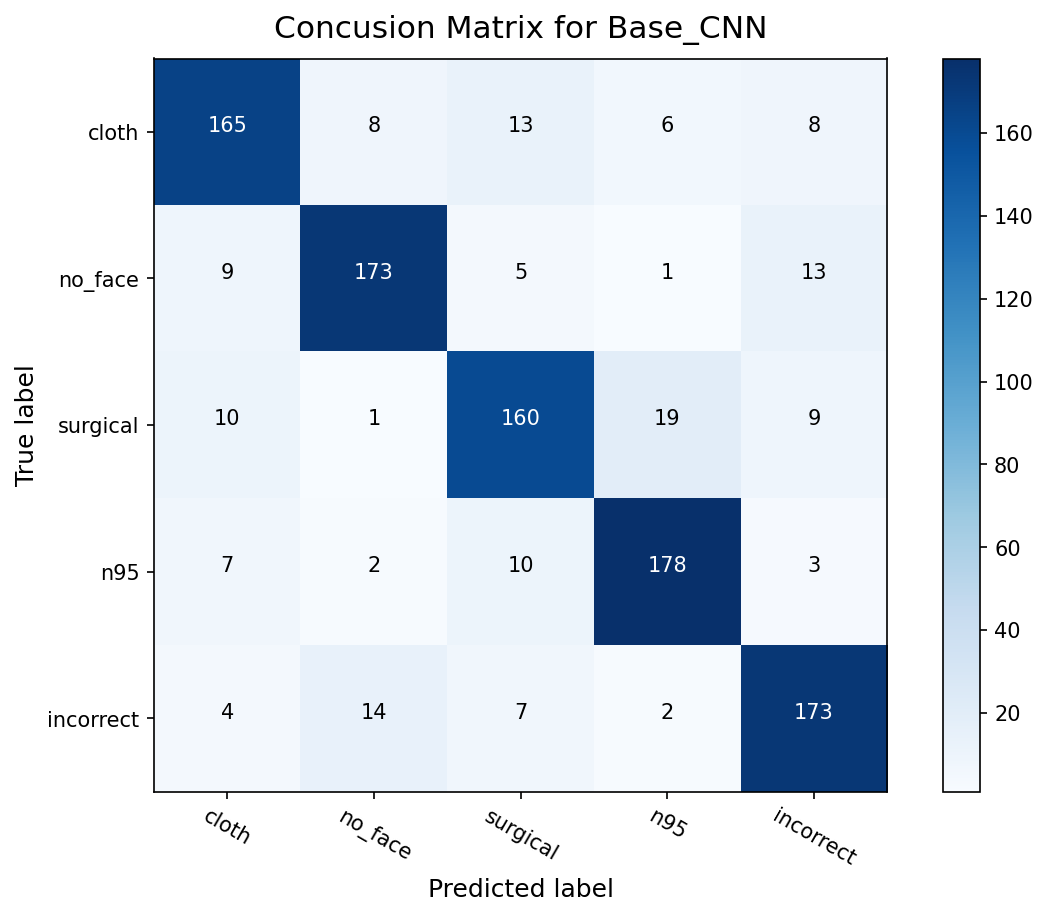

./Final_Test_MetricsBase_CNN.npz
              precision    recall  f1-score   accuary bias(fm - m)
cloth_m        0.805556  0.828571  0.816901  0.845238             
cloth_fm       0.869919  0.823077  0.845850  0.866438    0.0212003
no_face_m      0.881720  0.811881  0.845361  0.866071             
no_face_fm     0.866667  0.910000  0.887805  0.899123    0.0330514
surgical_m     0.757143  0.768116  0.762590  0.808140             
surgical_fm    0.856000  0.823077  0.839216  0.861486     0.053347
n95_m          0.872340  0.901099  0.886486  0.898058             
n95_fm         0.857143  0.880734  0.868778  0.884000   -0.0140583
incorrect_m    0.823529  0.843373  0.833333  0.857143             
incorrect_fm   0.851240  0.880342  0.865546  0.881481    0.0243386
Overall acc:  0.849


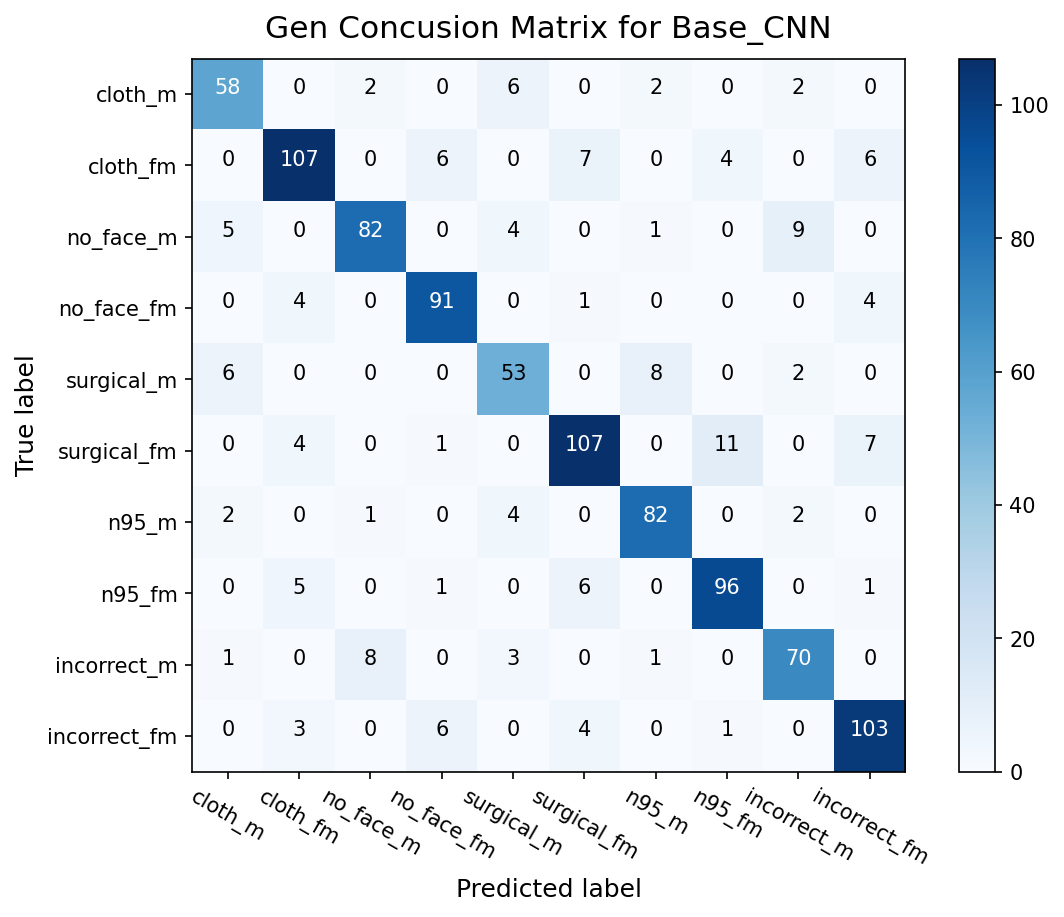

./Final_Test_MetricsBase_CNN.npz
                precision    recall  f1-score   accuary bias(afar - caas)
cloth_caas       0.847222  0.818792  0.832765  0.856725                  
cloth_afar       0.843137  0.843137  0.843137  0.864407        0.00768163
no_face_caas     0.857143  0.885246  0.870968  0.885714                  
no_face_afar     0.902778  0.822785  0.860927  0.877907       -0.00780731
surgical_caas    0.807947  0.792208  0.800000  0.833333                  
surgical_afar    0.863636  0.844444  0.853933  0.872549         0.0392157
n95_caas         0.867925  0.884615  0.876190  0.889831                  
n95_afar         0.851064  0.909091  0.879121  0.892157        0.00232635
incorrect_caas   0.851852  0.857143  0.854489  0.872973                  
incorrect_afar   0.795455  0.897436  0.843373  0.864583       -0.00838964
Overall acc:  0.849


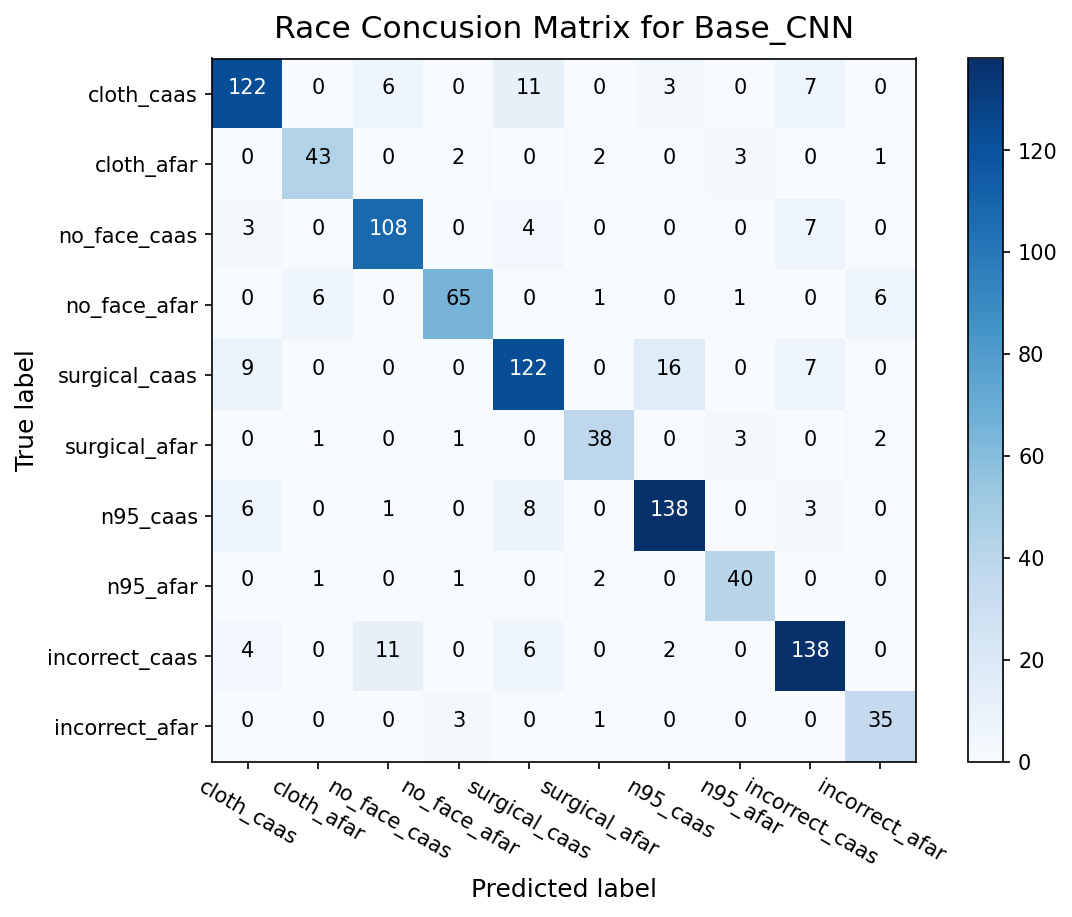

In [1]:
import evaluation

metrics_file_path = './Final_Test_MetricsBase_CNN.npz'

evaluation.read_socres(metrics_file_path, conf_m_title='Concusion Matrix for Base_CNN')
evaluation.read_socres_gen(metrics_file_path, conf_m_title='Gen Concusion Matrix for Base_CNN')
evaluation.read_socres_race(metrics_file_path, conf_m_title='Race Concusion Matrix for Base_CNN')

In [3]:
import torch
import numpy as np
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import torchvision.transforms as T
import matplotlib.pyplot as plt

from data_process.DatasetHelper import label_map
from data_process.DatasetHelper import label_map_new
from data_process.DatasetHelper import ImageDataset

data = ImageDataset('./data/aug_2')
data_loader = torch.utils.data.DataLoader(data, batch_size=100000, shuffle=True, num_workers=1)

for data, labels in data_loader:
    data_X, data_y = data.float(), labels
    
data_y = data_y.numpy()

label: 0 with 1000 images, named as "cloth_mask"
label: 1 with 1000 images, named as "no_face_mask"
label: 2 with 1000 images, named as "surgical_mask"
label: 3 with 1000 images, named as "n95_mask"
label: 4 with 1000 images, named as "mask_worn_incorrectly"


In [4]:
from evaluation import downgrade_argmax_target_to_gen, mask_label_name_list
from data_process.DatasetHelper import label_map_new_gen

gen_label_list = [downgrade_argmax_target_to_gen(y) for y in data_y]

d = {}

for l in gen_label_list:
    l_name = label_map_new_gen[l]
    if d.get(l_name) == None:
        d[l_name] = 0
    d[l_name] += 1

print(d)

gen_arr = {'m': [d[mask_male_label] for mask_male_label in [l + '_m' for l in mask_label_name_list]], 
           'fm': [d[mask_male_label] for mask_male_label in [l + '_fm' for l in mask_label_name_list]]}

bias = []

for i in range(5):
    bias.append(gen_arr['fm'][i] - gen_arr['m'][i])
    
gen_arr['bias(fm - m)'] = bias

import pandas as pd
df = pd.DataFrame(data=gen_arr, index=mask_label_name_list)

df

{'n95_mask_fm': 546, 'no_face_mask_m': 503, 'mask_worn_incorrectly_fm': 583, 'surgical_mask_m': 347, 'surgical_mask_fm': 653, 'mask_worn_incorrectly_m': 417, 'no_face_mask_fm': 497, 'n95_mask_m': 454, 'cloth_mask_fm': 651, 'cloth_mask_m': 349}


,m,fm,bias(fm - m)
cloth_mask,349,651,302
no_face_mask,503,497,-6
surgical_mask,347,653,306
n95_mask,454,546,92
mask_worn_incorrectly,417,583,166


In [8]:
from evaluation import downgrade_argmax_target_to_race, mask_label_name_list
from data_process.DatasetHelper import label_map_new_race
race_label_list = [downgrade_argmax_target_to_race(y) for y in data_y]

d = {}

for l in race_label_list:
    l_name = label_map_new_race[l]
    if d.get(l_name) == None:
        d[l_name] = 0
    d[l_name] += 1

print(d)

race_arr = {'caas': [d[mask_male_label] for mask_male_label in [l + '_caas' for l in mask_label_name_list]], 
           'afar': [d[mask_male_label] for mask_male_label in [l + '_afar' for l in mask_label_name_list]]}

bias = []

for i in range(5):
    bias.append(race_arr['afar'][i] - race_arr['caas'][i])
    
race_arr['bias(afar - caas)'] = bias

import pandas as pd
df = pd.DataFrame(data=race_arr, index=mask_label_name_list)

df

{'n95_mask_caas': 779, 'no_face_mask_afar': 392, 'mask_worn_incorrectly_caas': 806, 'surgical_mask_caas': 773, 'surgical_mask_afar': 227, 'no_face_mask_caas': 608, 'n95_mask_afar': 221, 'cloth_mask_caas': 747, 'cloth_mask_afar': 253, 'mask_worn_incorrectly_afar': 194}


,caas,afar,bias(afar - caas)
cloth_mask,747,253,-494
no_face_mask,608,392,-216
surgical_mask,773,227,-546
n95_mask,779,221,-558
mask_worn_incorrectly,806,194,-612
